# Mental Health Dataset Exploration

## Imports/Reading in Data

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define path (location of csv)
path = "mental_health_diagnosis_treatment_.csv"

# Read csv into dataframe
df = pd.read_csv(path)

## Data Overview/Validation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

In [5]:
df.isnull().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [7]:
df.describe()

,Patient ID,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,38.708000,7.478000,5.482000,6.472000,5.216000,12.110000,7.542000,7.436000,75.45400
std,144.481833,12.712433,1.706265,1.707486,1.668167,2.829374,2.440864,1.709409,1.725067,9.08697
min,1.000000,18.000000,5.000000,3.000000,4.000000,1.000000,8.000000,5.000000,5.000000,60.00000
25%,125.750000,28.000000,6.000000,4.000000,5.000000,3.000000,10.000000,6.000000,6.000000,67.00000
50%,250.500000,38.000000,8.000000,5.000000,6.000000,5.000000,12.000000,8.000000,7.000000,76.00000
75%,375.250000,50.000000,9.000000,7.000000,8.000000,8.000000,14.000000,9.000000,9.000000,84.00000
max,500.000000,60.000000,10.000000,8.000000,9.000000,10.000000,16.000000,10.000000,10.000000,90.00000


## Data Transformation

### New Column - Age Group

In [8]:
# Define the age bins and their corresponding labels (1-5)
bins = [18, 24, 34, 44, 54, 60]  # Age range bins (18-24, 25-34, 35-44, 45-54, 55-60)
labels = [1, 2, 3, 4, 5]  # Corresponding group numbers

# Use pd.cut to categorize 'Age' into the new age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True, right=True)

### New Column, Physical Activity

In [9]:
bins = [0, 1, 3, 5, 10]
labels = ['Sedentary', 'Low Activity', 'Moderate Activity', 'High Activity'] # (0-1, 2-3, 3-5, 5+)

df['Activity Group'] = pd.cut(df['Physical Activity (hrs/week)'], bins=bins, labels=labels, right=True)

## Univariate Analysis

#### Age

In [11]:
df['Age'].describe().reset_index()

,index,Age
0,count,500.000000
1,mean,38.708000
2,std,12.712433
3,min,18.000000
4,25%,28.000000
5,50%,38.000000
6,75%,50.000000
7,max,60.000000


0.036770367011909534


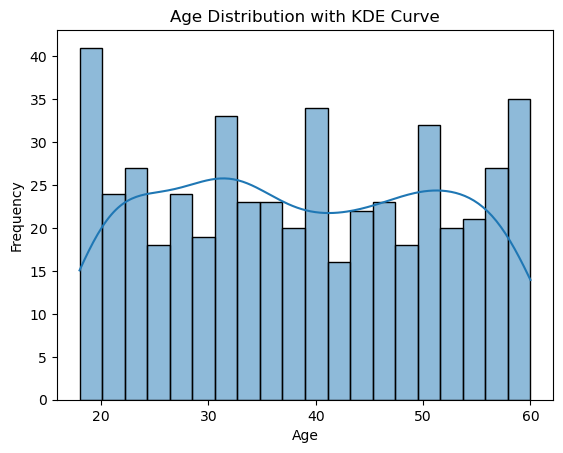

In [27]:
print(df['Age'].skew())
sns.histplot(data=df, x='Age', kde=True, bins=20 , edgecolor='black')

plt.title('Age Distribution with KDE Curve')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Sleep Quality

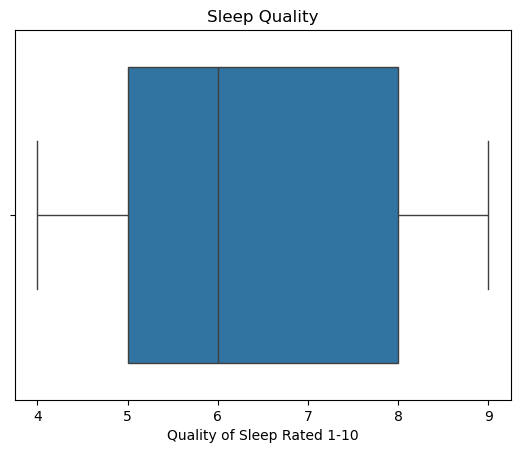

In [47]:
sns.boxplot(data=df, x='Sleep Quality (1-10)', orient = 'y')
plt.title("Sleep Quality")
plt.xlabel("Quality of Sleep Rated 1-10")
plt.show()

#### Diagnosis

In [38]:
diagnosis_counts = df['Diagnosis'].value_counts() 
print(diagnosis_counts)

Diagnosis
Generalized Anxiety          135
Major Depressive Disorder    125
Bipolar Disorder             124
Panic Disorder               116
Name: count, dtype: int64


([0, 1, 2, 3],
 [Text(0, 0, 'Generalized Anxiety'),
  Text(1, 0, 'Major Depressive Disorder'),
  Text(2, 0, 'Bipolar Disorder'),
  Text(3, 0, 'Panic Disorder')])

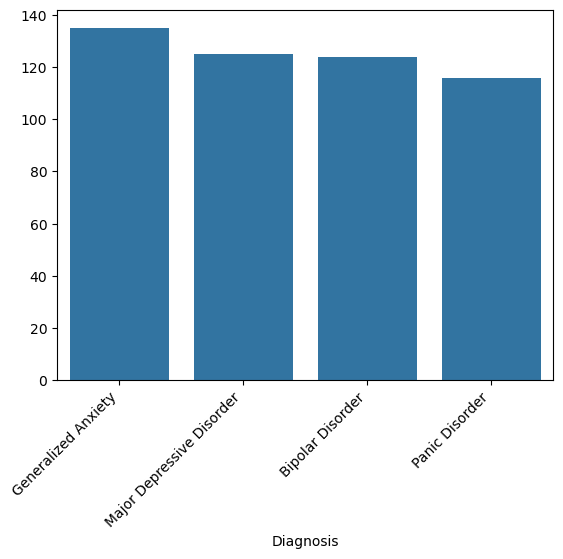

In [42]:
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
plt.xticks(rotation=45, ha="right")

## Bivariate Analysis

### Graph: Stacked Bar Chart, (Treatment Types = X, and different outcome counts = Y for each bar)

### Graph: 2-3 Line Graphs, How a given mental illness affect people of different ages

## Conclusions